# 2CSSID Lab05. Neural Networks

<p style='text-align: right;font-style: italic;'>Designed by: Mr. Abdelkrime Aries</p>

In this lab, we will learn about neural networks (NN).
We will implement backpropagation to understand how a NN works.
Then, we will test many concepts:
- Parameters' initialization
- Activation functions effect
- Optimization functions for NN

**Team:**
- **Member 01**: CHERGUELAINE Oussama   
- **Member 02**: RAHOU Meriem

In [2]:
import matplotlib
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
from matplotlib      import colors 
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '3.9.2')

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow              import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model


E0000 00:00:1733338239.029391   12849 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733338239.069587   12849 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from typing          import Tuple, List, Type, Union
from collections.abc import Callable

## I. Algorithms implementation

In this section, we will try to implement a NN.
A network is composed of many layers, each of many neurons.


**>> Try to use "numpy" which will save a lot of time and effort** 

In [10]:
# API (Do not change, or you'll see double)
# This is just an interface to define Activation and Loss functions' behaviour

# =====================================================
# =========== Activation function API =================
# =====================================================
class Activation(object): 
    """Base Class to implement activation functions"""

    def __init__(self):
        raise Exception('This class is abstract; implement it')
      
    def activate(self, Z):
        """Calculates the activation based on Z"""
        raise Exception('Must be implemented in child class')

    def partial(self, Z, H):
        """Calculates partial derivative based on Z and the activation H"""
        raise Exception('Must be implemented in child class')

# =====================================================
# ============== Loss function API ====================
# =====================================================
class Loss(object): 
    """Base Class to implement loss functions"""

    def __init__(self):
        raise Exception('This class is abstract; implement it')

    def calculate(self, H, Y):
        """Calculates the loss based on the infered output H and the real output Y"""
        raise Exception('Must be implemented in child class')
    
    def partial(self, H, Y):
        """Calculates partial derivative based on the infered output H and the real output Y"""
        raise Exception('Must be implemented in child class')

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# This class is abstract; implement it
# This class is abstract; implement it
# works3
#---------------------------------------------------------------------

try:
    aa = Activation()
    print('works1')
except Exception as e:
    print(e)
try:
    ll = Loss()
    print('works2')
except Exception as e:
    print(e)

class ActivationChild(Activation):
    def __init__(self):
        pass
try:
    aa = ActivationChild()
    print('works3')
except Exception as e:
    print(e)

This class is abstract; implement it
This class is abstract; implement it
works3


### I.1. Activation functions

You have to implement both logistic regression and ReLU activation functions. 

Logistic regression:
$$H = \sigma(Z) = \frac{1}{1+e^{-Z}} \ \ \ \ \ \ \frac{\partial \sigma(Z)}{\partial Z} = \sigma(Z) (1-\sigma(Z))$$

ReLU:
$$H = ReLU(Z) = \begin{cases} Z & \text{if } Z > 0 \\ 0 & \text{otherwise}\end{cases}
\ \ \ \ \ \ 
\frac{\partial ReLU(Z)}{\partial Z} = \begin{cases} 1 & \text{if } Z > 0 \\ 0 & \text{otherwise}\end{cases}$$


In [57]:
# TODO: Logistic Activation class
class Logistic(Activation):
    def __init__(self):
        pass
    def activate(self, Z):
        return  1 / (1 + np.exp(-Z))
    def partial(self, arr, arr2):
        return self.activate(arr) * (1 - self.activate(arr))

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))
#---------------------------------------------------------------------

lg = Logistic()
z4_1       = np.array([1.666, 1.68])
a4_1       = lg.activate(z4_1)
a4_1p      = lg.partial(z4_1, a4_1)

a4_1, a4_1p

(array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))

In [53]:
# TODO: ReLU Activation class
class ReLU(Activation):
    def __init__(self):
        pass
    def activate(self, Z):
        return np.maximum(0, Z)
    def partial(self, Z, H):
        return (Z > 0).astype(int)

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([0., 2., 0.]), array([0., 1., 0.]))
#---------------------------------------------------------------------

relu = ReLU()
z_t  = np.array([0, 2, -3])
a_t  = relu.activate(z_t)
p_t  = relu.partial(z_t, a_t)

a_t, p_t

(array([0, 2, 0]), array([0, 1, 0]))

### I.2. Loss functions

Binary Cross ntropy (BCE) loss function is calculated as:
$$BCE(Y, H) = - ( Y \log(H) + (1-Y) \log(1-H))$$

It's derivative is calculated as:
$$\frac{\partial BCE}{\partial H} = \frac{H-Y}{H - H^2}$$

In [58]:
# TODO: BCE Loss class
class BCE(Loss):
    def __init__(self):
        pass

    def calculate(self, H, Y):
        # Avoid log(0) issues by clipping H to a safe range
        # H = np.clip(H, 1e-15, 1 - 1e-15)
        return -(Y * np.log(H) + (1 - Y) * np.log(1 - H))
    
    def partial(self, H, Y):
        # Derivative of BCE with respect to H
        # H = np.clip(H, 1e-15, 1 - 1e-15)  # To avoid division by zero
        return (H - Y) / (H * (1 - H))

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))
#---------------------------------------------------------------------

bce = BCE()

H = np.array([0.840 , 0.843])
Y = np.array([0., 1.])
J = bce.calculate(H, Y)
DJ = bce.partial(H, Y)

J, DJ

(array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))

### I.3. Neuron

Let us implement retropropagation of one neuron.

$$\delta^{(l)} = \frac{\partial f^{(l)}}{\partial z^{(l)}} w^{(l+1)} \delta^{(l+1)}$$

$$\frac{\partial J}{\partial w^{(l)}} = a^{(l-1)} \delta^{(l)}$$

$$\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

The product is a matrix product (on $M$) and we must take the average of the outputs (on $Ln$).

The function that updates the parameters takes as input:
- $W[L_p]$ a list of weights; a vector of size $L_p$ (the number of neurons in the previous layer)
- $b$ bias
- $Z[M]$ the linear combination of the current neuron; a vector of size $M$ (the number of samples)
- $A[M]$ the activation of the current neuron; a vector of size $M$
- $A\_past[M, L_p]$ the activations of the neurons of the previous layer; a matrix of size is $(M * L_p)$
- $Delta\_next[M, Ln]$ the delta calculated in the next layer; a matrix of size $M * L_n$ ($L_n$: the number of neurons in the next layer)
- $W\_next[Ln]$ the weights to the next layer; a vector of size $Ln$
- $act$ is an "Activation" type object; it provides two methods: "act.activate" and "act.partial"
- $alpha$ the training step

In [59]:
# TODO: Neuron Backpropagation
def backpropagate_neuron(W, b, Z, A, A_past, Delta_next, W_next, act, alpha=1.):
    
    Delta = np.dot(W_next, Delta_next.T) * act.partial(Z, A)
    bn    = b - alpha * np.mean(Delta, axis=0)
    Wn    = W - alpha * np.dot(Delta.T, A_past) / A_past.shape[0]
    return Wn, bn, Delta

#=====================================================================
# UNIT TEST 
#=====================================================================
# Result: 
# (array([0.49375218, 0.2046736 ]),
#  -0.30324311474187016,
#  array([ 0.00696306, -0.00047683]))
#---------------------------------------------------------------------

W_t = np.array([0.5, 0.2])
b_t = -0.3
Z_t = np.array([0.5, 2.2])

# A_t[M] (This neuron's current activation)
A_t = np.array([0.62245933, 0.90024951])

# A_past_t[M, L_p] (This neuron's past layer's activations)
A_past_t = np.array([[2., -1.], [3., 5.]])

# Delta_next_t[M, L_n] (This neuron's next layer's deltas)
Delta_next_t = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T

# W_next_t[L_n] (This neuron's next layer's Weights)
W_next_t = np.array([0.3, -0.1])

act = Logistic() # Activation function

W_nouv, b_nouv, Delta_nouv = backpropagate_neuron(W_t, b_t, Z_t, A_t, A_past_t, Delta_next_t, W_next_t, act, alpha=1.)

W_nouv, b_nouv, Delta_nouv

(array([0.49375218, 0.2046736 ]),
 np.float64(-0.30324311473938026),
 array([ 0.00696306, -0.00047683]))

In [60]:
# Nothing to do here 
class Neuron(object):
    def __init__(self, in_size, activation=Logistic()):
        self.b   = 0.
        self.w   = np.array([0.] * in_size)
        self.act = activation
        
    def randomize(self):
        self.w = np.random.rand(len(self.w))
        self.b = np.random.rand(1)[0]
        
    def __aggregate(self, X):
        return np.dot(X, self.w) + self.b
    
    def activate(self, X):
        self.a_past = X
        self.z      = self.__aggregate(X)
        self.a      = self.act.activate(self.z)
        return self.a
    
    def update(self, delta_next, w_next, alpha=1.):
        w_past                = self.w.copy()
        self.w, self.b, delta = backpropagate_neuron(self.w, self.b, self.z, self.a, self.a_past, delta_next, w_next, self.act, alpha=alpha)
        return delta, w_past

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# z2_1 = [0.5 2.2]
# a2_1 = [0.62245933 0.90024951]
# partial(a2_1) = [0.23500371 0.08980033]
# past b = -0.3
# past w = [0.5 0.2]
# delta2 = [ 0.00696306 -0.00047683]
# new b = -0.30324311473938026
# new w = [0.49375218 0.2046736 ]
#---------------------------------------------------------------------

# New neuron with two inputs
n = Neuron(2)
# ---------------------
# We should not affect the weights directly
# Here, it's just to have the same weights of the output neuron in the example seen in the lecture
# We will reproduce the parameters of neuron 1 hidden layer 1 (layer 2)
n.b = -0.3
n.w = np.array([0.5, 0.2])
# ---------------------

# M X Lp (Here A1 = X; the input)
A1 = np.array([[2., -1.], [3., 5.]])
# M X Ln (Delta of the next layer)
Delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W3_1 = np.array([0.3, -0.1])


A2_1 = n.activate(A1)
print("z2_1 = " + str(n.z))
print("a2_1 = " + str(A2_1))
# The partial derivative of logistic function does not need Z, so we pass 0 (to not calculte it)
print("partial(a2_1) = " + str(n.act.partial(0, A2_1)))
print("past b = " + str(n.b))

Delta2, W2_past = n.update(Delta3, W3_1) 

print("past w = " + str(W2_past))
print("delta2 = " + str(Delta2))
print("new b = " + str(n.b))
print("new w = " + str(n.w))

z2_1 = [0.5 2.2]
a2_1 = [0.62245933 0.90024951]
partial(a2_1) = 0.25
past b = -0.3
past w = [0.5 0.2]
delta2 = [ 0.00696306 -0.00047683]
new b = -0.30324311473938026
new w = [0.49375218 0.2046736 ]


### I.4. Layer

A layer is a list of neurons.
In this case, the packpropagation of the layer takes:
- **neurons**: a list of activated neurons.
- **Delta_next**: Delta from the next layer.
- **W_next**: next layer's weights
- **alpha**: learning rate

The function returns a tuple:
- Deltas of the current layer (all neurons)
- Past weights of the current layer (all neurons)

In [64]:
# TODO: Layer Backpropagation
def backpropagate_layer(neurons, Delta_next, W_next, alpha=1.):
    W_pasts = []
    Deltas  = []
    for i, neuron in enumerate(neurons):
        delta, w_past = neuron.update(Delta_next, W_next[i], alpha=alpha)
        Deltas.append(delta)
        W_pasts.append(w_past)
    return np.array(Deltas).T, np.array(W_pasts).T


#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# deltas : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
# past W : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------


neurons_t = [Neuron(2), Neuron(2)]

# We should not directly assign  weights 
# Here, it is just to have the same weights of the output neuron of the lecture's example
neurons_t[0].b = -0.3
neurons_t[0].w = np.array([0.5, 0.2])
neurons_t[1].b = 0.5
neurons_t[1].w = np.array([0.3, 0.4])

delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

a1 = np.array([[2., -1.], [3., 5.]])
neurons_t[0].activate(a1)
neurons_t[1].activate(a1)

Deltas2, W_pasts2 = backpropagate_layer(neurons_t, delta3, w3)

print("deltas : " + str(Deltas2))
print("past W : " + str(Deltas2))

deltas : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]
past W : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


In [65]:
# Do not edit
class Layer(object):
    
    def __init__(self, size, in_size, activation=Logistic()):
        self.neurons = [Neuron(in_size, activation=activation) for i in range(size)]
        
    def randomize(self):
        for neuron in self.neurons:
            neuron.randomize()

    def forward(self, X):
        activations = []
        for neuron in self.neurons:
            activations.append(neuron.activate(X))
        return np.array(activations).T
    
    def backward(self, Delta_next, W_next, alpha=1.):
        return backpropagate_layer(self.neurons, Delta_next, W_next, alpha=alpha)



#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# Activations: [[0.62245933 0.66818777]
#  [0.90024951 0.96770454]]
# Deltas: [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------

# layer 2 (2 neurons, 2 inputs)
c2 = Layer(2, 2)

# We should not directly assign  weights 
# Here, it is just to have the same weights of the output neuron of the lecture's example
c2.neurons[0].b = -0.3
c2.neurons[0].w = np.array([0.5, 0.2])
c2.neurons[1].b = 0.5
c2.neurons[1].w = np.array([0.3, 0.4])

delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

a1 = np.array([[2., -1.], [3., 5.]])
a2 = c2.forward(a1)
print("Activations: " + str(a2))

Deltas2, W_pasts2 = c2.backward(delta3, w3)

print("Deltas: " + str(Deltas2))

Activations: [[0.62245933 0.66818777]
 [0.90024951 0.96770454]]
Deltas: [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


### I.5. Network

A network is composed of a list of layers.
Here, we want to implement backpropagation over layers (from the last one into the first)


For the last layer:
- w_past is a list of ones of the this layer's size. Such as [[1.], [1.], ...]
- delta_past is the gradient of the loss function "J_prime" which must be calculated using the cost function, the output H and the real output Y

Then, each layer apply a backpropagation and returns delta_past, w_past which will be fed into the previous layer.

The function must return the cost J which is the average of all losses

In [66]:
# TODO: Network Backpropagation
def backpropagate_network(layers, cost, H, Y):
    delta_past = cost.partial(H, Y)
    w_past = np.ones((layers[-1].neurons[0].w.shape[0], 1))
    
    for layer in reversed(layers):
        delta_past, w_past = layer.backward(delta_past, w_past, alpha=1.0)
    
    J = np.mean(cost.calculate(H, Y))
    
    return J

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# w4_1 = [0.51494626 0.56592079]
# w3_1 = [0.2665629 0.4641237]
# w3_2 = [-0.13199638 -0.33433028]
# w2_1 = [0.49375219 0.2046736 ]
# w2_2 = [0.29342937 0.40384135]
# 1.0020916974430965
#---------------------------------------------------------------------

X = np.array([[2., -1.], [3., 5.]])
Y = np.array([[0.], [1.]])

layers = [ Layer(2, 2), Layer(2, 2), Layer(1, 2) ]

# We should not directly assign  weights 
# Here, it is just to have the same weights of the output neuron of the lecture's example
layers[0].neurons[0].b = -0.3
layers[0].neurons[0].w = np.array([0.5, 0.2])
layers[0].neurons[1].b = 0.5
layers[0].neurons[1].w = np.array([0.3, 0.4])

layers[1].neurons[0].b = -0.3
layers[1].neurons[0].w = np.array([0.3, 0.5])
layers[1].neurons[1].b = -0.2
layers[1].neurons[1].w = np.array([-0.1, -0.3])

layers[2].neurons[0].b = 1.
layers[2].neurons[0].w = np.array([0.7, 0.7])

H = X
for layer in layers:
    H = layer.forward(H)

J = backpropagate_network(layers, bce, H, Y)

print("w4_1 = " + str(layers[2].neurons[0].w))
print("w3_1 = " + str(layers[1].neurons[0].w))
print("w3_2 = " + str(layers[1].neurons[1].w))
print("w2_1 = " + str(layers[0].neurons[0].w))
print("w2_2 = " + str(layers[0].neurons[1].w))

J


w4_1 = [0.51494626 0.56592079]
w3_1 = [0.2665629 0.4641237]
w3_2 = [-0.13199638 -0.33433028]
w2_1 = [0.49375219 0.2046736 ]
w2_2 = [0.29342937 0.40384135]


np.float64(1.0020916974430965)

In [67]:
# Do not change
class NN(object):
    def __init__(self, in_size, cost=bce, alpha=1.):
        self.current_size = in_size # the last layer's size 
        self.cost = cost
        self.alpha = alpha
        self.layers = []

    def add_layer(self, size, activation=Logistic()):
        new_layer = Layer(size, self.current_size, activation=activation)
        self.layers.append(new_layer)
        self.current_size = size
        
    def randomize(self):
        for layer in self.layers:
            layer.randomize()
    
    def predict(self, X): 
        Y = X
        if self.norm:
            Y = np.where(self.std==0, X, (X - self.mean)/self.std)
            
        for layer in self.layers:
            Y = layer.forward(Y)
        if Y.ndim == 2 and Y.shape[1] == 1:
            Y = Y.flatten()
        return np.where(Y < 0.5, 0, 1)
    
    
    def _one_iteration(self, X, Y):
        # forward propagation
        a = X
        for layer in self.layers:
            a = layer.forward(a)
            
        # cost and its derivative calculation
        YY = np.array(Y)
        if YY.ndim < 2 : 
            YY = YY[:, np.newaxis]
        
        # backward propagation 
        J = backpropagate_network(self.layers, self.cost, a, YY)
    
        return J
    
    def fit(self, X, Y, nbr_it=100, norm=False):
        costs = []
        X_norm = X
        self.norm = norm
        if norm:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
            X_norm = np.where(self.std==0, X, (X - self.mean)/self.std)

        for i in range(nbr_it): 
            J = self._one_iteration(X_norm, Y)
            costs.append(J)
        return costs
    
#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# cost = 1.0020916974430965
# w4_1 = [0.51494626 0.56592079]
# w3_1 = [0.2665629 0.4641237]
# w3_2 = [-0.13199638 -0.33433028]
# w2_1 = [0.49375219 0.2046736 ]
# w2_2 = [0.29342937 0.40384135]
# Prediction: [0 1]
#---------------------------------------------------------------------

X = np.array([[2., -1.], [3., 5.]])
Y = np.array([0., 1.])

nn = NN(2) # 2 features
nn.add_layer(2) # add a hidden layer with 2 neurons
nn.add_layer(2) # add a hidden layer with 2 neurons
nn.add_layer(1) # add an output layer with 1 neuron

# We should not affect the weights directly
# Here, it's just to have the same weights of the output neuron in the example seen in the lecture
nn.layers[0].neurons[0].b = -0.3
nn.layers[0].neurons[0].w = np.array([0.5, 0.2])
nn.layers[0].neurons[1].b = 0.5
nn.layers[0].neurons[1].w = np.array([0.3, 0.4])

nn.layers[1].neurons[0].b = -0.3
nn.layers[1].neurons[0].w = np.array([0.3, 0.5])
nn.layers[1].neurons[1].b = -0.2
nn.layers[1].neurons[1].w = np.array([-0.1, -0.3])

nn.layers[2].neurons[0].b = 1.
nn.layers[2].neurons[0].w = np.array([0.7, 0.7])

J = nn._one_iteration(X, Y)

print("cost = " + str(J))
print("w4_1 = " + str(nn.layers[2].neurons[0].w))
print("w3_1 = " + str(nn.layers[1].neurons[0].w))
print("w3_2 = " + str(nn.layers[1].neurons[1].w))
print("w2_1 = " + str(nn.layers[0].neurons[0].w))
print("w2_2 = " + str(nn.layers[0].neurons[1].w))

nn.fit(X, Y, nbr_it=200)
print("Prediction: " + str(nn.predict(X)))


cost = 1.0020916974430965
w4_1 = [0.51494626 0.56592079]
w3_1 = [0.2665629 0.4641237]
w3_2 = [-0.13199638 -0.33433028]
w2_1 = [0.49375219 0.2046736 ]
w2_2 = [0.29342937 0.40384135]
Prediction: [0 1]


## II. Application and Analysis

In this section, we will test different concepts by running an experiment, formulating a hypothesis and trying to justify it.
To do this, we will use a light version of diabetes dataset.

In [6]:
# diabetes2
diabetes   = pd.read_csv("data/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:,  -1].values

# This configuration is on purpose
# to test the case where regression is disfavored
NBR_TEST   = 240
# Assuming the first 30% rows are for testing and the rest for training
X_test     = X_diabetes[-NBR_TEST:, :] # 30% or more
Y_test     = Y_diabetes[-NBR_TEST:   ].reshape([-1, 1])

X_train    = X_diabetes[:-NBR_TEST, :] 
Y_train    = Y_diabetes[:-NBR_TEST   ].reshape([-1, 1])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
scaler   = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests  = scaler.transform(X_test)

X_trains[:5, :]

array([[ 0.63564802,  0.83833016,  0.16863427,  0.93506705, -0.67560188,
         0.22006711,  0.42947843,  1.43582544],
       [-0.85203884, -1.09137813, -0.14214721,  0.55085273, -0.67560188,
        -0.63225191, -0.38057337, -0.18535642],
       [ 1.23072277,  1.91039032, -0.24574104, -1.30618316, -0.67560188,
        -1.03405944,  0.56155209, -0.10003106],
       [-0.85203884, -0.96885697, -0.14214721,  0.16663841,  0.12145706,
        -0.44961212, -0.92060791, -1.03861003],
       [-1.14957621,  0.50139697, -1.48886696,  0.93506705,  0.74892899,
         1.37678577,  5.30446409, -0.0147057 ]])

#### II.1. Initial parameters and complexity

We want to test the benefit of parameters (thetas) initialization and the complexity of the model.
To do this, five models were trained in order to recover the training and validation errors. 
The tested models are:
- **Log0**: A single neuron (logistic regression) with initialization 0
- **LogR**: A single neuron (logistic regression) with random initialization
- **NN0**: A 4(relu)X2(relu)X1(sigmoid) neural network with initialization 0
- **NN1**: A 4(relu)X2(relu)X1(sigmoid) neural network with initialization 1
- **NNR**: A 4(relu)X2(relu)X1(sigmoid) neural network with random initialization

Log0 : Training ...
LogR : Training ...
NN0 : Training ...
NN1 : Training ...
NNR : Training ...


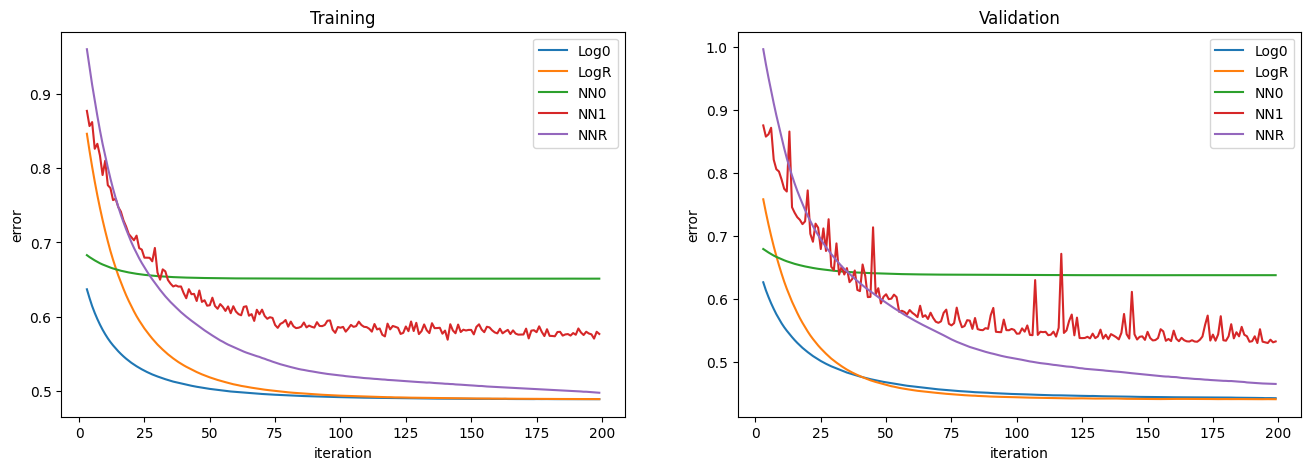

In [8]:
alpha  = 0.01
NBR_IT = 200

M, N = X_train.shape

# ==================================
# Définition des modèles
# ==================================

models = {}

models['Log0'] = Sequential()
models['Log0'].add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

models['LogR'] = Sequential()
models['LogR'].add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

models['NN0']  = Sequential()
models['NN0'].add(Dense(4, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
models['NN0'].add(Dense(2, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
models['NN0'].add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

models['NN1']  = Sequential()
models['NN1'].add(Dense(4, activation="relu", kernel_initializer='one', bias_initializer='one'))
models['NN1'].add(Dense(2, activation="relu", kernel_initializer='one', bias_initializer='one'))
models['NN1'].add(Dense(1, activation="sigmoid", kernel_initializer='one', bias_initializer='one'))

models['NNR']  = Sequential()
models['NNR'].add(Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
models['NNR'].add(Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
models['NNR'].add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

# ====================================
# Model training
# ====================================

# we do not display the first 3 iterations, until the model stabilizes
# otherwise, one model may have great value compared to others 
# therefore, we cannot visualize the convergence of the others
IT_range = range(NBR_IT)[3:]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))


for name, model in models.items():
    model.compile(loss      = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.SGD(learning_rate=alpha))
    print(name, ': Training ...')
    results = model.fit(X_trains, Y_train, epochs=NBR_IT, validation_data=(X_tests, Y_test), verbose=0)
    
    # ===========================
    # PREPARATION OF THE PLOT
    # ===========================
    ax1.plot(IT_range, results.history["loss"    ][3:], label=name)
    ax2.plot(IT_range, results.history["val_loss"][3:], label=name)

# ==================================
# PLOT 
# ==================================

ax1.title.set_text("Training")
ax2.title.set_text("Validation")

ax1.set(xlabel='iteration', ylabel='error')
ax2.set(xlabel='iteration', ylabel='error')

ax1.legend()
ax2.legend()
plt.show()

**TODO: Analyze the results**

1. We notice that single-neuron models are faster than neural network models (in terms of iterations and in terms of time). Why?
1. We notice that **NN0** does not improve (it stagnates from the first iterations). Explain why.
1. We notice that **NN1** improves compared to **NN0**, but it quickly stagnates compared to **NNR**. Explain why.
1. Based on validation, what is the relationship between the number of layers, the complexity of the problem, the number/quality of data and the learning problems (under/over). Mention 4 combinations that may cause problems.

**Answers**

1. Single-neuron models are faster because they have fewer parameters and simpler computations compared to neural networks. ALso logistic regression involves basic operations (one activation and one output), whereas neural networks require multiple matrix multiplications, activations, and gradient computations for each layer.
1. NN0 stagnates because initializing weights to 0 causes all neurons in the same layer to compute identical outputs and gradients. This symmetry prevents the network from learning distinct features, as all weights are updated uniformly.
1. NN1 improves over NN0 because weights are non-zero, breaking symmetry and enabling some learning. However, initializing all weights to 1 leads to excessively large activations, especially with ReLU, causing saturation in neurons and vanishing gradients. NNR avoids these issues by using random initialization techniques like Xavier or He, enabling better gradient flow and learning.
1. The number of layers must match the problem's complexity and available data to avoid underfitting or overfitting. For example, a shallow network underfits complex problems, while a deep network overfits small datasets. Poor initialization, noisy data, or excessive complexity can also cause learning failures, highlighting the need for proper model and data alignment.

#### II.2. Activation functions

We want to test which activation functions are more appropriate for the hidden layers and which ones for the output layer.
To do this, five models were trained in order to recover the history of the training error. 
The tested models are:
- **relu->sigm**: a network with **relu** in the hidden layers and **sigmoid** in the output layer
- **sigm->sigm**: a network with **sigmoid** in the hidden layers and **sigmoid** in the output layer
- **tanh->sigm**: a network with **tanh** in the hidden layers and **sigmoid** in the output layer
- **sigm->relu**: a network with **sigmoid** in the hidden layers and **relu** in the output layer
- **relu->relu**: a network with **relu** in the hidden layers and **relu** in the output layer

relu->sigm : Training ...
sigm->sigm : Training ...
tanh->sigm : Training ...
sigm->relu : Training ...
relu->relu : Training ...


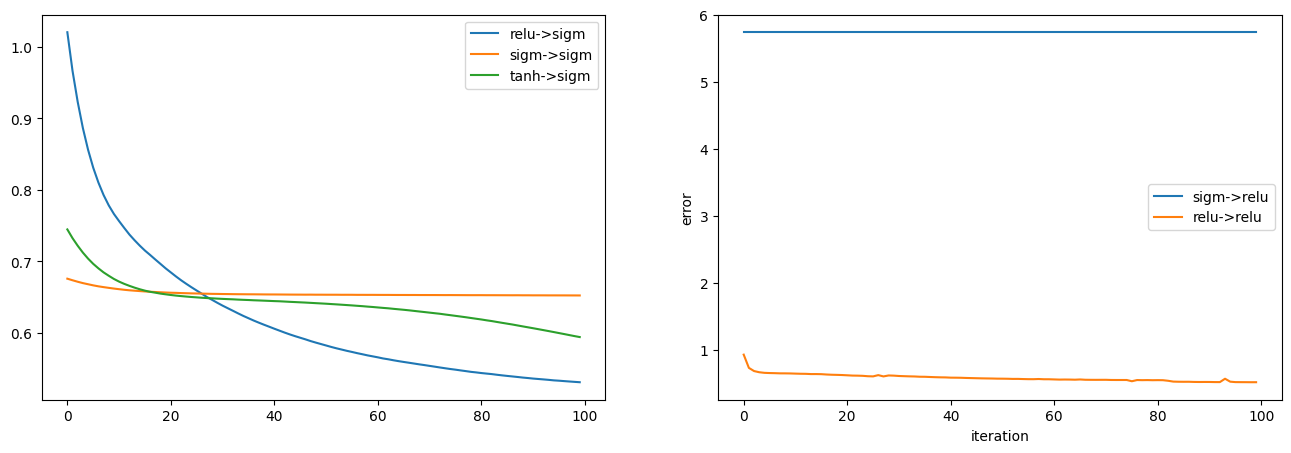

In [18]:
alpha  = 0.01
NBR_IT = 100

M, N = X_train.shape

L1 = 2 # Number of neurons in layer 1
L2 = 2 # Number of neurons in layer 2

# ==================================
# Models' design
# ==================================

defs = [ 
    ('relu->sigm', 'relu', 'sigmoid'),
    ('sigm->sigm', 'sigmoid', 'sigmoid'),
    ('tanh->sigm', 'tanh', 'sigmoid'),
    ('sigm->relu', 'sigmoid', 'relu'),
    ('relu->relu', 'relu', 'relu')
]

models = {}
params = {'kernel_initializer':'glorot_uniform', 'bias_initializer':'glorot_uniform'}

for name, in_act, out_act in defs:
    models[name] = Sequential()
    models[name].add(Dense(L1, activation = in_act , **params))
    models[name].add(Dense(L2, activation = in_act , **params))
    models[name].add(Dense(1,  activation = out_act, **params))

# ==================================
# Models' training
# ==================================

results = {}

for name, model in models.items():
    model.compile(loss      = tf.keras.losses.binary_crossentropy,
                  optimizer = tf.keras.optimizers.SGD(learning_rate=alpha))
    print(name, ': Training ...')
    results[name] = model.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)
    

# ==================================
# Plot 
# ==================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

for nom, result in results.items():
    ax = ax1 if nom.endswith('sigm') else ax2
    ax.plot(range(NBR_IT), result.history['loss'], label=nom)
    
ax1.legend()
ax2.legend()
plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

**TODO: Analyze the results**

1. We notice that the **sigmoid->sigmoid** model stagnated quickly. Explain how?
1. We notice that this model converged more quickly (in terms of number of iterations) compared to the two models with **sigmoid** output. Why?
1. We notice that the models with **relu** output are not stable; at each execution, we will have a different diagram (sometimes improvement, sometimes deterioration, etc.). It should be noted that random initialization is not the source of the problem since there are other similar but stable models. So why did they behave like this?

**Answers**

1. The sigmoid->sigmoid model stagnated because the sigmoid function squashes inputs into the [0,1] range, leading to vanishing gradients when backpropagating through layers. 
1. Models without a sigmoid output converge faster because sigmoid's saturation slows learning. In the saturated regions, where activations are close to 0 or 1, gradients become very small, hindering weight updates. Activation functions like ReLU or tanh avoid this issue by maintaining non-zero gradients across a broader range, enabling quicker error minimization.
1. ReLU as an output activation is unstable because it is unbounded, allowing for extremely large activations. These large outputs can amplify errors during backpropagation, leading to oscillations or exploding gradients.

#### II.3. Optimisation functions

We want to test different optimization functions.
To do this, four models were trained in order to recover the history of the training error. 
The tested models are:
- **GD**: a network trained with gradient descent
- **Adagrad**: a network trained with AdaGrad
- **RMSprop**: a network trained with RMSprop
- **Adam**: a network trained with Adam

GD : Training ...
Adagrad : Training ...
RMSprop : Training ...
Adam : Training ...


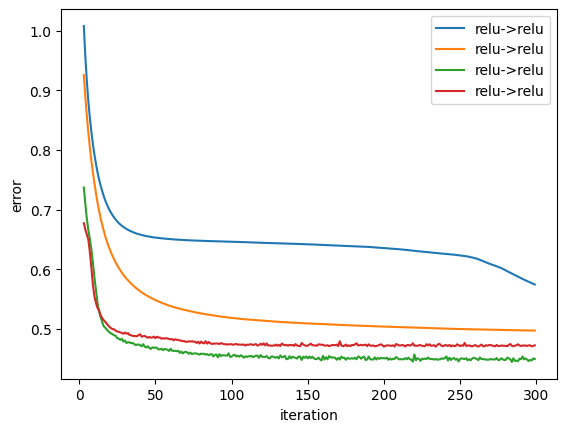

In [19]:
alpha  = 0.01
NBR_IT = 300

M, N = X_train.shape

L1 = 2
L2 = 2

# we do not display the first 3 iterations, until the model stabilizes
# otherwise, one model may have great value compared to others 
# therefore, we cannot visualize the convergence of the others
IT_range = range(NBR_IT)[3:]

defs = [ # Definitions
    ('GD'     , tf.keras.optimizers.SGD    (learning_rate=alpha)),
    ('Adagrad', tf.keras.optimizers.Adagrad(learning_rate=alpha)),
    ('RMSprop', tf.keras.optimizers.RMSprop(learning_rate=alpha)),
    ('Adam'   , tf.keras.optimizers.Adam   (learning_rate=alpha))
]

params = {'kernel_initializer':'glorot_uniform', 'bias_initializer':'glorot_uniform'}

for name, opt in defs:
    model = Sequential()
    model.add(Dense(L1, activation="relu"   , **params))
    model.add(Dense(L2, activation="relu"   , **params))
    model.add(Dense(1,  activation="sigmoid", **params))
    model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = opt)
    
    print(name, ': Training ...')
    results = model.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)
    plt.plot(IT_range, results.history["loss"][3:], label=nom)


plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

**TODO: Analyze the results**

1. We notice that the **GD** model converges faster than **AdaGrad**. Why?
1. Why does **RMSprop** converge faster than **AdaGrad**, yet their equations are almost similar? (here you have to explain the contribution in the equation of the first compared to the second)
1. By running this code several times, we notice that Adam is more stable. Why?

**Answers**

1. GD often converges faster initially because it uses a consistent learning rate throughout training, allowing steady progress in well-scaled problems. In contrast, AdaGrad adapts the learning rate based on the accumulation of past gradients, which can make the learning rate decrease too quickly, slowing convergence over time. This conservative adjustment can hinder AdaGrad in later iterations, especially in deep networks.
1. RMSprop and AdaGrad both use gradient magnitudes to adapt the learning rate, but RMSprop incorporates an exponential moving average (EMA) of past squared gradients, rather than a cumulative sum. This prevents the learning rate from shrinking too quickly, as it "forgets" older gradients.
1. Adam combines the benefits of RMSprop (adaptive learning rates via EMA) and Momentum (smoothing gradients with a moving average of past gradients), making it robust to noisy updates and variations.


In [20]:
print('Good luck')

Good luck
